In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("cleaned.csv", sep='\t')
df = df.loc[:25000]
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=0, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words='english')
features = tfidf.fit_transform(df.lyrics).toarray()
labels = df.genre

In [6]:
categories = df.genre.unique().tolist()

In [7]:
genre_vector = np.ones(features.shape[1])
for i in categories:
    df1 = df[df.genre == i]
    smth = np.zeros(features.shape[1])
    for index, row in df1.iterrows():
        smth = smth + features[index]
    genre_vector = np.vstack([genre_vector, smth])

In [8]:
eucliduan_dist = []
for i in range(genre_vector.shape[0]-1):
    dist = np.linalg.norm(genre_vector[0]-genre_vector[i+1])
    eucliduan_dist.append(dist)

In [9]:
cos_distance = []
for i in range(genre_vector.shape[0]-1):
    cos_sim = np.dot(genre_vector[0], genre_vector[i+1])/(np.linalg.norm(genre_vector[0])*np.linalg.norm(genre_vector[i+1]))
    cos_distance.append(cos_sim)

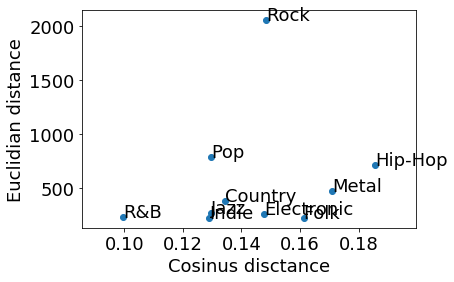

In [10]:
plt.rcParams.update({'font.size': 18})
plt.scatter(cos_distance, eucliduan_dist)
for i in range(len(categories)):
    plt.annotate(categories[i], (cos_distance[i], eucliduan_dist[i]))
plt.ylabel('Euclidian distance')
plt.xlabel('Cosinus disctance')
plt.show()